I use this notebook for any testing and miscellaneous stuff while writing code. \
Of useful stuff this notebook has code for getting differential FIMO hits (ie. peaks where there is a motif hit in one allele and not in other) and for calculating and visualizing confidence weights

In [1]:
%load_ext autoreload
%autoreload 2

# Random testing

In [2]:
import torch
from model import pairScan
model = pairScan(2,0.2)
x = torch.zeros((2,2,4,300))
_ = model(x)
print(sum([p.numel() for p in model.parameters()]))

394950


In [3]:
temp = dict()
with h5py.File('/data/leslie/shared/ASA/mouseASA/cd8/data/data_vi_150bp.h5','r') as f:
    temp['x_test_b6'] = f['x_test_b6'][()]
    temp['x_test_cast'] = f['x_test_cast'][()]
    temp['y_test_b6'] = f['y_test_b6'][()]
    temp['y_test_cast'] = f['y_test_cast'][()]

In [4]:
for k in temp.keys():
    print(temp[k].shape)

(3637, 300, 4)
(3637, 300, 4)
(3637,)
(3637,)


In [12]:
with h5py.File('/data/leslie/shared/ASA/mouseASA/cd8/data/data_vi_150bp_aug.h5','r') as f:
    print(f.keys())

<KeysViewHDF5 ['x_test_b6', 'x_test_cast', 'x_train_b6', 'x_train_b6_unegs', 'x_train_cast', 'x_train_cast_unegs', 'x_val_b6', 'x_val_b6_unegs', 'x_val_cast', 'x_val_cast_unegs', 'y_test_b6', 'y_test_cast', 'y_train_b6', 'y_train_cast', 'y_train_unegs', 'y_val_b6', 'y_val_cast', 'y_val_unegs']>


In [10]:
temp['x_test_b6'].shape

(3637, 300, 4)

In [14]:
import h5py
with h5py.File('/data/leslie/shared/ASA/mouseASA/cd8/data/data_vi_150bp_aug.h5','r') as f:
    print(f['x_test_b6'][()].shape)
    print(f['y_test_cast'][()].shape)

(3637, 300, 4)
(3637,)


In [7]:
from run import load_data
x = dict()
y = dict()
x['train'], x['val'], x['test'], y['train'], y['val'], y['test'] = load_data('cd8', 'both', '_vi_150bp')

In [6]:
for k in x.keys():
    print(x[k].shape)
    print(y[k].shape)

(33346, 2, 300, 4)
(33346, 2)
(5011, 2, 300, 4)
(5011, 2)
(7274, 2, 300, 4)
(7274, 2)


In [8]:
for k in x.keys():
    print(x[k].shape)
    print(y[k].shape)

(51302, 2, 300, 4)
(51302, 2)
(7710, 2, 300, 4)
(7710, 2)
(7274, 2, 300, 4)
(7274, 2)


## Differential FIMO hit loci

In [2]:
import pandas as pd
import numpy as np
path = '/data/leslie/shared/ASA/mouseASA/cd8/data/fimo/'
df_b6 = pd.read_csv(path+'fimo_b6_train.tsv', sep='\t').iloc[:-3,:]
df_ca = pd.read_csv(path+'fimo_ca_train.tsv', sep='\t').iloc[:-3,:]
# get unique entries (exclusive-or) in both dataframes
temp1 = set(df_b6['sequence_name'])
temp2 = set(df_ca['sequence_name'])
temp = list(temp1.union(temp2) - temp1.intersection(temp2))
# get allele-specific motif hits
df_b6 = df_b6[df_b6['sequence_name'].isin(temp)].reset_index(drop=True)
df_ca = df_ca[df_ca['sequence_name'].isin(temp)].reset_index(drop=True)

In [10]:
datadir='/data/leslie/shared/ASA/mouseASA/cd8/data/'
summits = pd.read_csv(datadir+'cutrun/tbet/summits_tbetfiltered.csv')
summits.head(20)

,chr,summit,diff,b6,ca
0,17,70963761,225,25,250
1,2,5379287,190,6,196
2,7,130834538,150,5,155
3,9,110281308,110,4,114
4,2,69380492,108,110,2
5,18,85698032,108,6,114
6,8,3754448,96,8,104
7,9,108144752,75,7,82
8,5,137857059,73,76,3
9,15,86195220,71,3,74


In [25]:
i=0
hits_b6 = []
hits_ca = []
for i in range(len(summits)):
    chrom, pos = summits.iloc[i,:2]
    hits_b6.append(np.where(df_b6['sequence_name']==f'{chrom}:{pos}')[0])
    hits_ca.append(np.where(df_ca['sequence_name']==f'{chrom}:{pos}')[0])
#     print(np.where(df_b6['sequence_name']==f'{chrom}:{pos}')[0])
#     print(np.where(df_ca['sequence_name']==f'{chrom}:{pos}')[0])

In [44]:
np.where(df_b6['sequence_name']=='8:86838925')[0]

array([36])

In [30]:
hits_b6[:50]

[array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([36]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([106]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([117]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array

In [31]:
hits_ca[:50]

[array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([0]),
 array([], dtype=int64),
 array([28]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64)

In [45]:
df_ca.iloc[0]

motif_id                      1
motif_alt_id         ADGTGWSAHN
sequence_name       19:53699992
start                     193.0
stop                      202.0
strand                        -
score                   13.4364
p-value                0.000001
q-value                   0.298
matched_sequence     AGGTGTGAAA
Name: 0, dtype: object

In [3]:
df_b6

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence
0,1,ADGTGWSAHN,16:96907974,200.0,209.0,+,13.4364,0.000001,0.310,AGGTGTGAAA
1,1,ADGTGWSAHN,12:4065711,195.0,204.0,-,13.1273,0.000002,0.310,AGGTGTGAAC
2,1,ADGTGWSAHN,6:50525776,21.0,30.0,+,12.7394,0.000005,0.339,AGGTGTCAAA
3,1,ADGTGWSAHN,8:116636144,242.0,251.0,+,12.7394,0.000005,0.339,AGGTGTCAAA
4,1,ADGTGWSAHN,1:138290204,54.0,63.0,-,12.7212,0.000006,0.339,AGGTGTGAAG
...,...,...,...,...,...,...,...,...,...,...
123,1,ADGTGWSAHN,1:165775783,280.0,289.0,-,10.4121,0.000094,0.574,ATGTGAGAAA
124,1,ADGTGWSAHN,6:30357936,4.0,13.0,+,10.4000,0.000096,0.581,AAGTGAGACA
125,1,ADGTGWSAHN,7:125635632,25.0,34.0,+,10.4000,0.000096,0.581,AAGTGAGACA
126,1,ADGTGWSAHN,2:77946312,122.0,131.0,-,10.3515,0.000099,0.590,AGGTGTTACT


In [4]:
df_ca

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence
0,1,ADGTGWSAHN,19:53699992,193.0,202.0,-,13.4364,0.000001,0.298,AGGTGTGAAA
1,1,ADGTGWSAHN,8:34615181,262.0,271.0,-,13.4364,0.000001,0.298,AGGTGTGAAA
2,1,ADGTGWSAHN,11:70988318,135.0,144.0,+,13.1273,0.000002,0.298,AGGTGTGAAC
3,1,ADGTGWSAHN,4:48034522,151.0,160.0,+,13.1273,0.000002,0.298,AGGTGTGAAC
4,1,ADGTGWSAHN,9:78010942,63.0,72.0,+,13.0788,0.000003,0.309,AGGTGTGACA
...,...,...,...,...,...,...,...,...,...,...
114,1,ADGTGWSAHN,9:108284570,160.0,169.0,-,10.4061,0.000095,0.582,AGGTGTTATA
115,1,ADGTGWSAHN,1:128675812,27.0,36.0,-,10.3879,0.000097,0.586,ATGTGTCAAG
116,1,ADGTGWSAHN,14:47358096,86.0,95.0,-,10.3879,0.000097,0.586,ATGTGTCAAG
117,1,ADGTGWSAHN,1:153709608,158.0,167.0,+,10.3758,0.000098,0.589,AAGTGTCACG


## Confidence Weights

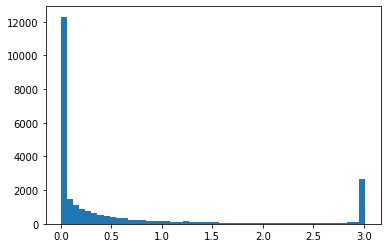

In [181]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

def get_confweights():
    train_sig_path = '/data/leslie/shared/ASA/mouseASA/cd8/data/significance/betabinom_result_combCounts_150bp_trainOnly.csv'
    pvals = pd.read_csv(train_sig_path)['p.adj']
    zscores = zscore(-np.log10(pvals+1e-5))
    zscores += abs(min(zscores))
    return zscores

plt.hist(get_confweights(), bins=50)
plt.show()

In [184]:
temp = get_confweights()
len(temp[temp>0.5])

7366

In [178]:
np.unique(np.sort(temp))

array([0.00000000e+000, 6.65177193e-305, 6.52593435e-275, ...,
       9.99914748e-001, 9.99958408e-001, 1.00000000e+000])

In [154]:
train_sig_path = '/data/leslie/shared/ASA/mouseASA/cd8/data/significance/betabinom_result_combCounts_150bp_trainOnly.csv'
pvals = pd.read_csv(train_sig_path)['p.adj']

In [157]:
len(pvals[pvals<0.05])

5951

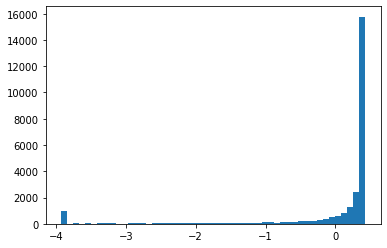

In [152]:
plt.hist(get_betabin_zscores(), bins=50)
plt.show()